- **Name: Swatik Paul**
- **Roll No: 2018IMT-100**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107-2021**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans 
from sklearn import datasets

In [17]:
iris = datasets.load_iris()
Data = pd.DataFrame(iris.data, columns = iris.feature_names)
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


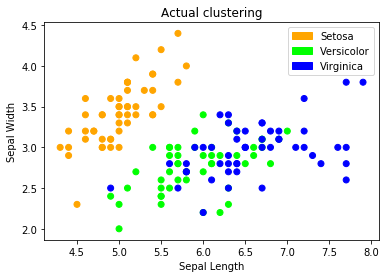

In [18]:
colors = np.array(['orange', 'lime', 'blue'])
orange_patch = mpatches.Patch(color='orange', label='Setosa')
lime_patch = mpatches.Patch(color='lime', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Actual clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend(handles=[orange_patch, lime_patch, blue_patch])

## K-Means Clustering

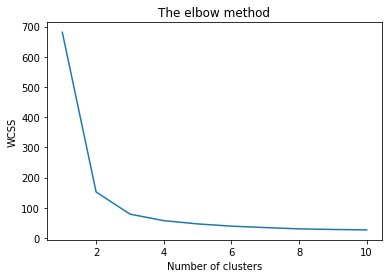

In [19]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [82]:
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


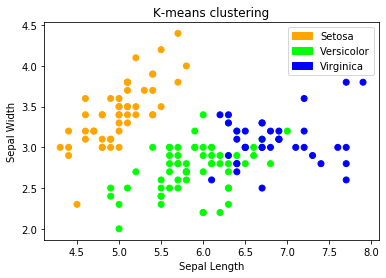

In [87]:
predictedY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title("K-means clustering")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend(handles=[orange_patch, lime_patch, blue_patch])
plt.show()

In [84]:
import sklearn.metrics as sm
sm.accuracy_score(predictedY, y['Target'])

0.8933333333333333

In [85]:
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

## EM Algorithm with a Gaussian Mixture Model

Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Sepal Width')

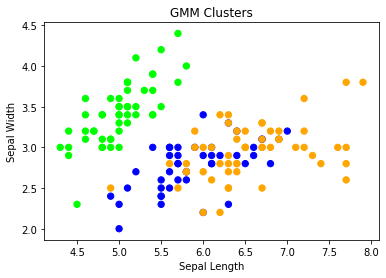

In [86]:
# General EM for GMM
from sklearn import preprocessing
from scipy.stats import mode

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_X = scaler.transform(x)

xs = pd.DataFrame(scaled_X, columns = x.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = sm.accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

colormap = np.array(['orange', 'lime', 'blue'])
plt.scatter(x['Sepal Length'], x['Sepal Width'], c = colormap[gmm_y], s = 40)
plt.title('GMM Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Applying PCA (Principal Component Analysis)

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = Data.iloc[:,:4]
# Standardize the data to have a mean of ~0 and a variance of 1
#X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
scores = pca.fit_transform(X)
#pca = PCA().fit(X)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance');

In [71]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## K-Means Clustering with PCA

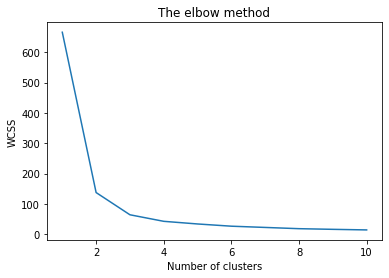

In [73]:
wcss = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans_pca.fit(scores)
    wcss.append(kmeans_pca.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [76]:
kmeans_pca = KMeans(n_clusters = 3)
kmeans_pca.fit(scores)
print(kmeans_pca.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


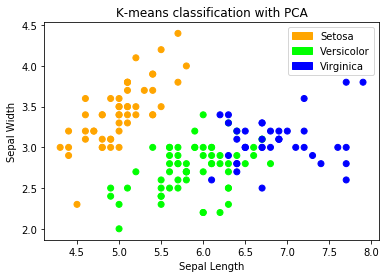

In [90]:
predictedY_pca = np.choose(kmeans_pca.labels_, [1, 0, 2]).astype(np.int64)

plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[predictedY_pca])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title("K-means classification with PCA")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend(handles=[orange_patch, lime_patch, blue_patch])

In [78]:
sm.accuracy_score(predictedY_pca, y['Target'])

0.8866666666666667

In [53]:
sm.confusion_matrix(predictedY_pca, y['Target'])

array([[50,  0,  0],
       [ 0, 47, 14],
       [ 0,  3, 36]], dtype=int64)

## EM Algorithm with PCA

In [106]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.utils import shuffle
X = pd.DataFrame(iris.data)

Y = pd.DataFrame(iris.target)
X,Y = shuffle(X,Y)

pca = PCA(n_components=2)
X_p = pca.fit_transform(X)

model2=GaussianMixture(n_components=3,random_state=3425)
model2.fit(X_p)

res= model2.predict(X_p)
print('The accuracy of EM model is: {}'.format(sm.accuracy_score(Y,res)))

The accuracy of EM model is: 0.98
